In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Generate some data and plot them

In [2]:
## Generate some data and plot them
X_val = np.random.uniform(-10.0, 10.0, size=(100,1))
Y_val = 5.7 * X_val - 3.25 + np.random.normal(scale=10, size=(100,1))

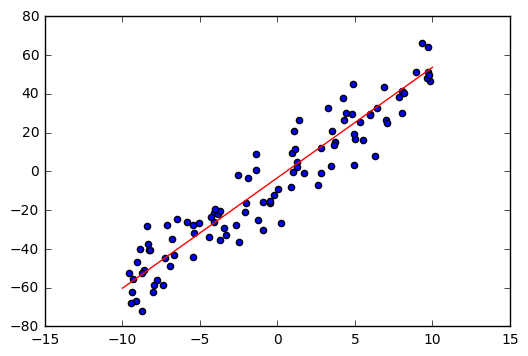

In [3]:
plt.scatter(X_val , Y_val)
plt.plot(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100) * 5.7 - 3.25, color='red')

# Building the model

Assume a linear model

$$ \hat{y} = a \cdot x + b  $$

Training objective to find $a$, and $b$ that minmize the loss value $MSE$.
$$ MSE  = \frac{1}{N} \sum_{i=1}^{N} {(y_i - \hat{y}_i)^2}$$

# Build the graph 

In [4]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='x')
w = tf.Variable(initial_value=tf.truncated_normal(shape=[]), name='w')
b = tf.Variable(initial_value=0.0, name='b')
y_ = w * x + b

Instructions for updating:
Use `tf.global_variables_initializer` instead.


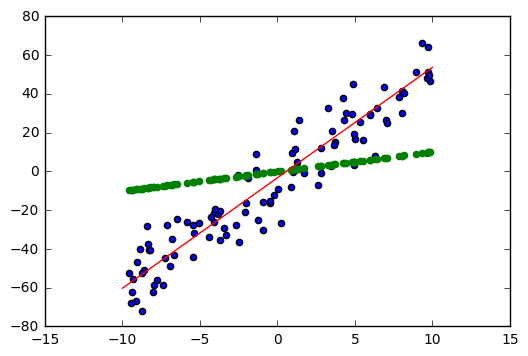

In [5]:
with tf.Session() as session:
    init_op = tf.initialize_all_variables()
    session.run(init_op)
    y_pred = session.run(y_, feed_dict={x: X_val})
    plt.scatter(X_val , Y_val)
    plt.plot(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100) * 5.7 - 3.25, color='red')
    plt.scatter(X_val , y_pred, color='green')



## Define a cost value

In [6]:
y = tf.placeholder(tf.float32, shape=[None, 1])
cost = tf.reduce_mean(tf.squared_difference(y, y_))

## Define optimizer

In [24]:
minimizer = tf.train.GradientDescentOptimizer(learning_rate=0.003)
train_op = minimizer.minimize(cost)

## Run the train op

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step 1 - loss = 1290.446777.
Step 2 - loss = 855.868225.
Step 3 - loss = 584.596863.
Step 4 - loss = 415.239014.
Step 5 - loss = 309.481476.
Step 6 - loss = 243.414841.
Step 7 - loss = 202.118332.
Final weights and bias ( 4.501519, -0.239130) 


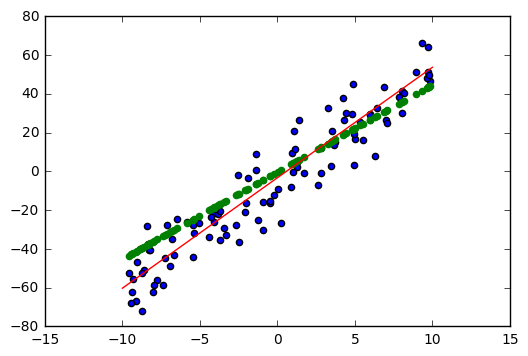

In [29]:
n_steps = 7
with tf.Session() as session:
    init_op = tf.initialize_all_variables()
    session.run(init_op)
    for step_idx in range(n_steps):
        cur_loss, _ = session.run([cost, train_op], feed_dict={x: X_val, y: Y_val})
        print('Step %d - loss = %f.' %(step_idx+1, cur_loss))
        #y_pred = session.run(y_, feed_dict={x: X_val})
        
    y_pred = session.run(y_, feed_dict={x: X_val})
    plt.scatter(X_val , Y_val)
    plt.plot(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100) * 5.7 - 3.25, color='red')
    plt.scatter(X_val , y_pred, color='green')
    ## 
    w_ , b_ = session.run([w, b])
    print('Final weights and bias ( %f, %f) ' %(w_, b_))

In [8]:
writer = tf.summary.FileWriter('.', tf.get_default_graph())
writer.close()